# Bayesian Inference

## Objectives: 

- **Use conditional probabilities** and understand the **mathematical notation** associated with them
- Compare and contrast **frequentist** and **Bayesian** approaches to inference
- **Use Bayes' Theorem** to iteratively update a prior probability

## Why Learn Bayesian Inference?

- Naive Bayes Classifiers (ML)
- Bayesian Hyperparameter Tuning (For Neural Nets + Complex ML)
- Optimization
- Lots of other cool machine learning stuff

*These are examples of topics we will be covering later in the course.*

## Conditional Probability

Remember back in Module 1 when I said there are lots and lots (and lots and lots and lots) of rules of probability.  We're going to talk about one more now.

### The Law of Conditional Probability

Let A and B be two events.  The probability of A given B is equal to the probability of A and B divided by the probability of B.

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$


Let's see this in action as we try to predict the probability of survival for a passenger on the Titanic.

In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(887, 8)


Survived  Pclass  ... Parents/Children_Aboard     Fare
0         0       3  ...                       0   7.2500
1         1       1  ...                       0  71.2833
2         1       3  ...                       0   7.9250
3         1       1  ...                       0  53.1000
4         0       3  ...                       0   8.0500

[5 rows x 8 columns]

Let A be the event of surviving the sinking and B be the event of being a male passenger.  

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

P(A|B) = the probability of surviving given that the passenger was male

P(A $\cap$ B) = the probability of surviving and being male

P(B) = the probability of being male




We can actually calculate all of those quantities from our data and show that they are equal.

In [ ]:
#Crosstab of Sex and Survived

pd.crosstab(df['Sex'],df['Survived'], margins=True)


Survived    0    1  All
Sex                    
female     81  233  314
male      464  109  573
All       545  342  887

In [ ]:
P_B = 573/887
print(P_B)

P_A_and_B = 109/887
print(P_A_and_B)

0.6459977452085682
0.12288613303269448


By the Law of Large Numbers, 

P(B) = P(Male) = 0.65

P(A and B) = P(Survived and Male) =0.12

Let A be the event of surviving the sinking and B be the event of being a male passenger.  

$$P(A|B) = \frac{0.12}{0.65}$$




In [ ]:
P_A_given_B = P_A_and_B/P_B

print(P_A_given_B)

0.19022687609075042


Using Bayes Rule, we calculate the P(A|B) = 0.19

Now let's check to see if this matches what we get when we calculate the conditional probability of surviving given that a passenger is male.

In [ ]:
pd.crosstab(df['Sex'], df['Survived'], normalize="index")

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.809773  0.190227

P(A|B) = P(Survived|Male) = .19

It works!

#Who was Bayes and why do we care about Bayesian statistics?

Thomas Bayes (c. 1701 – 7 April 1761)was an English statistician, philosopher and Presbyterian minister who is known for formulating a specific case of the theorem that bears his name: Bayes' theorem. 

Bayes never published what would become his most famous accomplishment; his notes were edited and published after his death by Richard Price.

This has led to some speculation as to whether Bayes actually thought his rule was a good idea or not!

Credit also belongs two another mathematician, Pierre-Simpon Laplace (inventor of the Central Limit Theorem) who deveoped Bayes' rule in its modern form.

###Bayes was working on a specific problem that perplexed mathematicians and staticticans of his day (who - by the way - were pretty much all compulsive gamblers).

In the first decades of the eighteenth century, many problems concerning the probability of certain events, given specified conditions, were solved. For example: given a specified number of white and black balls in an urn, what is the probability of drawing a black ball? 

> This should sound like conditional probability (ie P(A|B)) above.

It was also pretty simple to figure out the probability of a single event (ie. P(B) ).

However, P(A $\cap$ B) often remained unknown.

By figuring out 

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

Bayes Rule allows us to solve

P(A $\cap$ B) = P(A|B) x P(B)


Because

P(A $\cap$ B) = P(B $\cap$ A)


We can write 

P(A $\cap$ B) =P(B $\cap$ A) = P(B|A) x P(A)

And substitute into our orignal formula to get 

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$


#The cookie problem

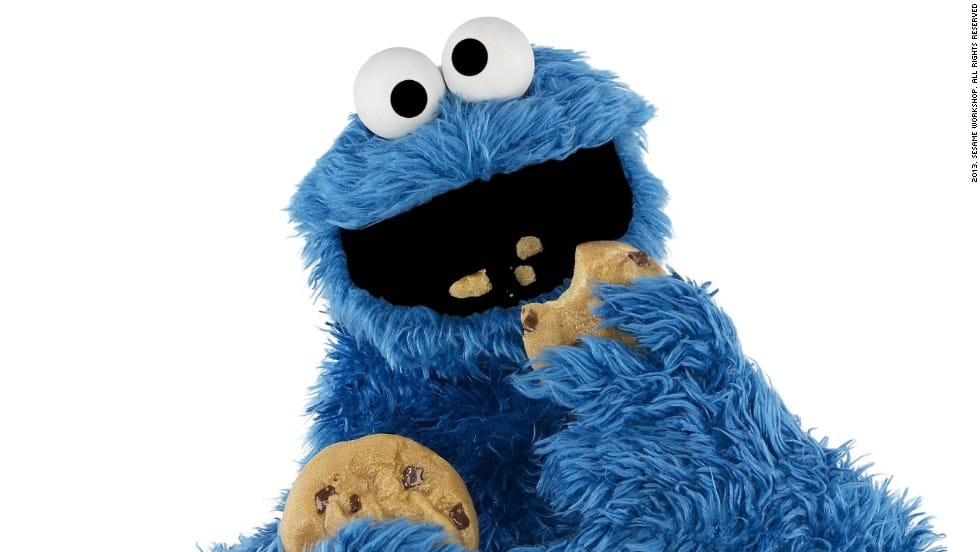

Suppose there are two bowls of cookies. 

* Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. 

* Bowl 2 contains 20 of each.



Now suppose you choose one of the bowls at random and, without looking,
select a cookie at random. The cookie is vanilla. What is the probability that
it came from Bowl 1?


This is a conditional probability; we want p(Bowl 1|vanilla), but it is not
obvious how to compute it. 






---


Let's write B1 for the event that the cookie came from Bowl 1 and V for event the cookie is vanilla.



Here's Bayes's Rule again:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Let A be the event the cookie came from Bowl 1 and B is the event the cookie is vanilla.

Using the variables from the cookie problem, we get

$$p(B1|V) = \frac{p(B1) p(V |B1)}{p(V)}$$

The term on the left is what we want: the probability of Bowl 1, given that
we chose a vanilla cookie. 

The terms on the right are:

* p(B1): This is the probability that we chose Bowl 1, unconditioned by
what kind of cookie we got. Since the problem says we chose a bowl at
random, we can assume p(B1) = 1/2
* p(V|B1): This is the probability of getting a vanilla cookie from Bowl 1,
which is 30/40 = 3/4

* p(V): This is the probability of drawing a vanilla cookie from either
bowl. Since we had an equal chance of choosing either bowl and the
bowls contain the same number of cookies, we had the same chance of
choosing any cookie. Between the two bowls there are 50 vanilla and 30
chocolate cookies, so p(V) = 50/80 = 5/8


Putting it together, we have
$$\textrm{p(B1|V)} = \frac{(1/2)(3/4)}{5/8} = \frac{3}{5}$$

So the vanilla cookie is evidence in favor of the hypothesis that we chose Bowl 1, because vanilla cookies are more likely to come from Bowl 1.

Source: https://greenteapress.com/wp/think-bayes/

###So... what?

The Big Idea that came out of this was the scientific framework:

**Initial belief + New Data -> Improved belief**

Bayes' Rule was important in


*   Cracking the code of the German Enigma Machine (Alan Turing)
*   The development of the "bit" (Claude Shannon)
* [And many, many other applications](https://www.lesswrong.com/posts/RTt59BtFLqQbsSiqd/a-history-of-bayes-theorem)



## Bayesian vs Frequentist Inference



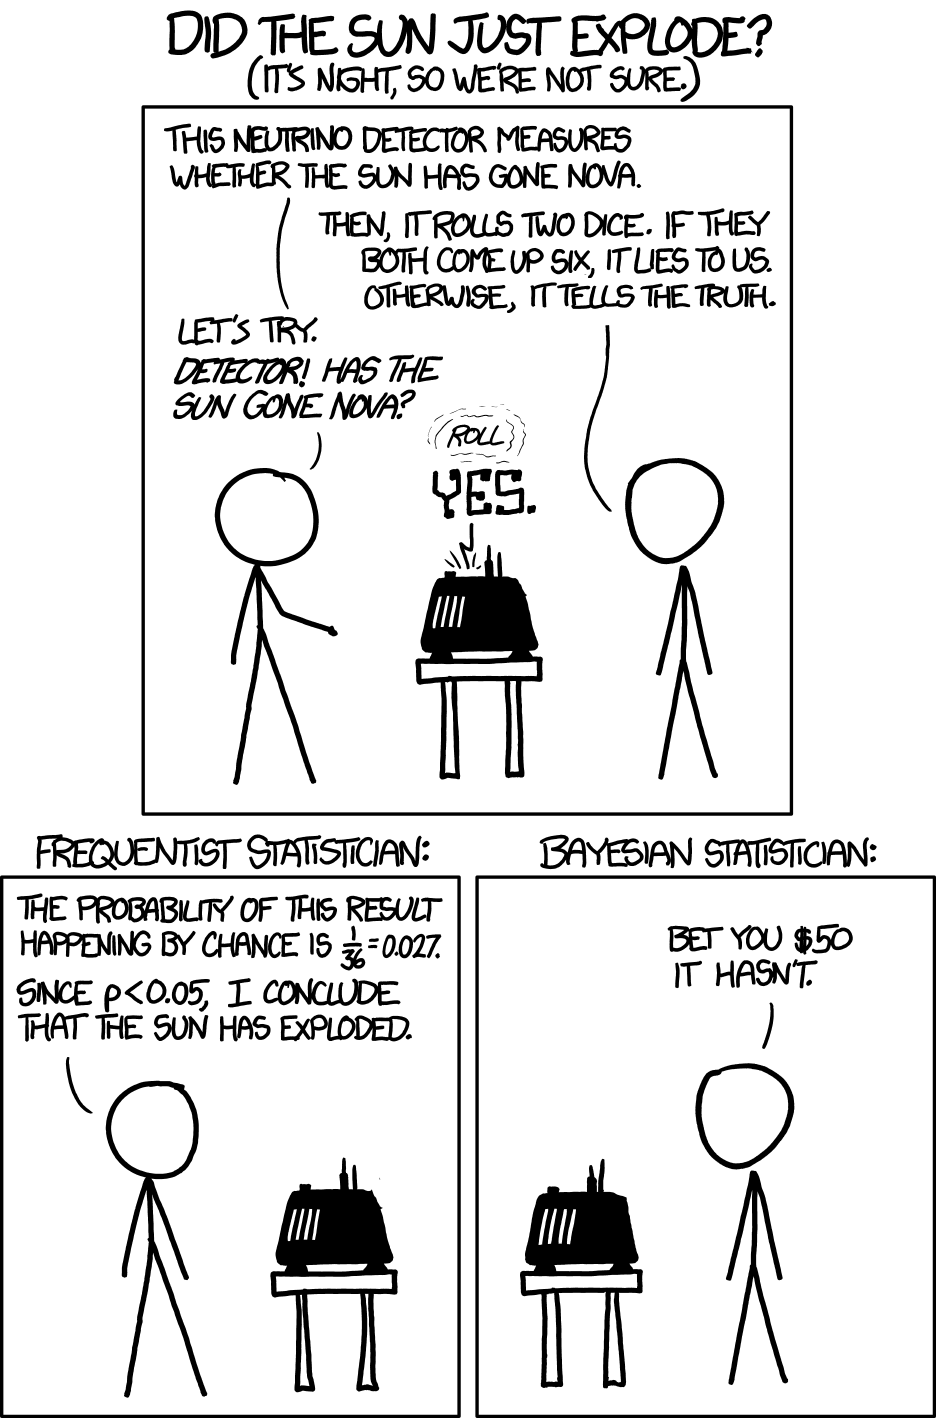

The joke explained: https://www.explainxkcd.com/wiki/index.php/1132:_Frequentists_vs._Bayesians

###What really is the difference between the Bayesian and frequentist approach?

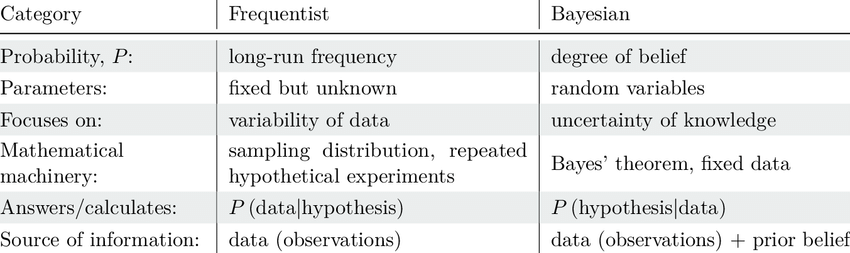

#### If we wanted to know the true mean height of all male emperor penguins:
> **Frequentist**: “We humans don't know the true mean height of all male emperor penguins; however, there is exactly one true mean height that could be knowable to - say - an advanced alien species."

> **Bayesian**: “Hang on, that's crazy!  Emperor penguins are born and die every second.  How could there possibly be one single answer to that question?  There will always be uncertainty around the true value of the population mean.”

> **Bayesian also**: “And by the way, we already know something about how tall emperor penguins are.  We know they aren't 4 inches tall and we know they aren't 40 feet tall.  Shouldn't we incorporate this prior knowledge into our estimate in some way?”

#Bayesian Statistical Modeling in Action

## Let's get even more fancy with Bayes' Rule

Start with:

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

But wait!

P(A $\cap$ B) = P(B $\cap$ A)

So!

We can re-write 

P(B $\cap$ A) = P(B|A) x P(A)

And substitute into our orignal formula to get 

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

###Woah...

All of these terms have important functions in calculating the probability of an outcome using a Bayesian framework.

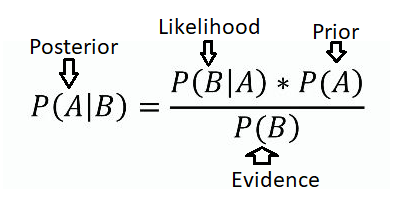

* The **posterior** probability is the probability of the event of interest happening.  Bayesian probability

* The **likelihood** is what we could consider normal hypothesis testing if we were frequentists.

* The **prior** is our prior knowledge about the outcome

* The **evidence** is evidence from a sample or experiment

Another way to think about this is:

P(hypothesis|data) = P(data|hypothesis)P(hypothesis)/P(data)

The cool thing about Bayesian statistics is that we don't do this just once.  It's an iterative process where we calculate a posterior probability, plug *that* value in for the prior probability, calculate another posterior probability, plug that in for prior probability, and on and on.

We stop the interative process when the posterior probability stops changing with repeated iterations.  We say that our algorithm has converged on the answer.

#Bayesian Search Theory

[The application of Bayes theory to search for lost objects.](https://en.wikipedia.org/wiki/Bayesian_search_theory)






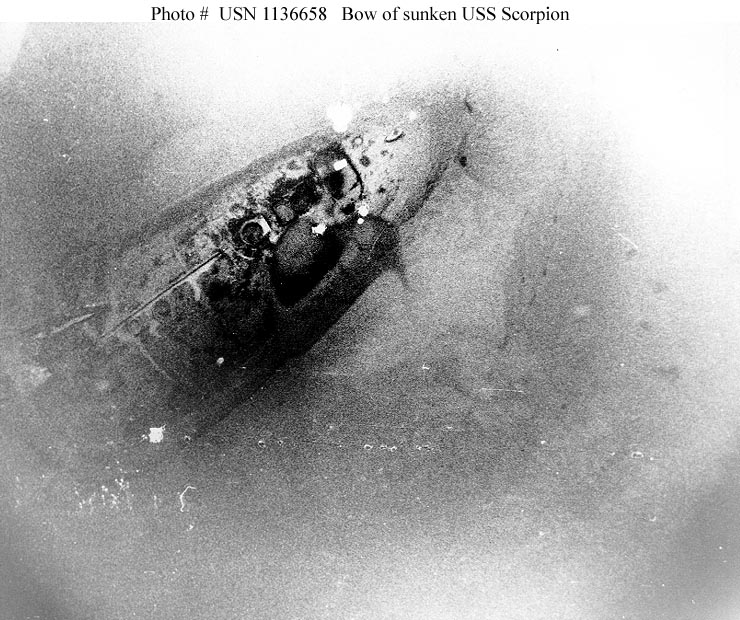





The USS Scorpion (SSN-589) was a Skipjack-class nuclear powered submarine that served in the United States Navy and the sixth vessel of the U.S. Navy to carry that name.  Scorpion was lost under mysterious conditions on 22 May 1968, killing all 99 crewmen. It was one of the four mysterious submarine disappearances in 1968, including the Israeli submarine INS Dakar, the French submarine Minerve, and the Soviet submarine K-129.

The Scorpion attempted to send radio traffic to Naval Station Rota for an unusually long period beginning shortly before midnight on 20 May and ending after midnight on 21 May, but it was only able to reach a Navy communications station in Nea Makri, Greece, which forwarded the messages to COMSUBLANT.

Lt. John Roberts was handed Commander Slattery's last message that he was closing on the Soviet submarine and research group, running at a steady 15 kn (28 km/h; 17 mph) at a depth of 110 m (350 ft) "to begin surveillance of the Soviets".  Six days later, the media reported that she was overdue at Norfolk.

The Navy suspected possible failure and launched a search, but Scorpion and her crew were declared "presumed lost" on 5 June. Her name was struck from the Naval Vessel Register on 30 June. The search continued with a team of mathematical consultants led by Dr. John Piña Craven, the Chief Scientist of the Navy's Special Projects Division. They employed the methods of Bayesian search theory, initially developed during the search for a hydrogen bomb lost off the coast of Palomares, Spain in January 1966 in the Palomares B-52 crash.

Soure: [Wikipedia](https://en.wikipedia.org/wiki/USS_Scorpion_(SSN-589))

###How do you find submarine wreckage an ocean?


1. Formulate as many reasonable hypotheses as possible about where the sub could be. (Communications from the sub, eyewitness testimony, etc.)

2. For each hypothesis, determine how likely it is that you think the sub is in that spot.

3. Determine how likely it is that you would actually findthe sub in that location.  In an ocean search, this is usually a function of water depth — in shallow water chances of finding an object are good if the search is in the right place. In deep water chances are reduced.

4. Combine the above information coherently to produce an overall probability density map. (Usually this simply means multiplying the two functions together.) This gives the probability of finding the object by looking in location X, for all possible locations X. (This can be visualized as a contour map of probability.)

5. Construct a search path which starts at the point of highest probability and 'scans' over high probability areas, then intermediate probabilities, and finally low probability areas.

6. Revise all the probabilities continuously during the search. For example, if the hypotheses for location X imply the likely disintegration of the object and the search at location X has yielded no fragments, then the probability that the object is somewhere around there is greatly reduced (though not usually to zero) while the probabilities of its being at other locations is correspondingly increased. The revision process is done by applying Bayes' theorem.

###Given that we can actually find it, what is the probability of the sub being in a specific area?

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

$\qquad$

Posterior probability = $\frac{Likelihood*Prior}{Data}$

$\qquad$


$P(\textrm{sub being in that spot|we can find it}) = \frac{P(\textrm{finding sub|in that spot})*P(\textrm{being in that spot})}{P(\textrm{finding the sub})}$

$\qquad$

###Search in areas where the posterior probability is the greatest.



###Bayesian Search Theory - New for the Nintendo Switch

http://www.et.bs.ehu.es/bayes/EN/

Source: A Web Simulator to Assist in the Teaching of Bayes’ Theorem
M. J. Bárcena,M. A. Garín,A. Martín,F. Tusell &A. Unzueta
Pages 68-78 | Accepted author version posted online: 23 Apr 2019, Published online: 12 Jun 2019

#Disease testing 

A patient goes to see a doctor. The doctor performs a test with 99 percent reliability -- that is, 99 percent of people who are sick test positive and 99 percent of the healthy people test negative. The doctor knows that only 1 percent of the people in the country are sick. The question is: if the patient tests positive, what are the chances the patient is sick?

Source: https://www.scientificamerican.com/article/what-is-bayess-theorem-an/

Imagine a hypothetical sitution where there are 10,000 people in the country.



|        | Diseased | Not Diseased |        |   |
|:------:|:--------:|:------------:|--------|---|
| Test + |    99    |      99      |   198  |   |
| Test - |     1    |     9,801    |  9,802 |   |
|        |    100   |     9,900    | 10,000 |   |

In this scenario P(A) is the unconditional probability of disease; here it is 1% or 100/10000

P(B) is the unconditional probability of a positive test; here it is 198/10000

We also know the sensitivity of the test is 99%, i.e., P(B | A) = .99; therefore, among the 100 diseased people, 99 will test positive.

What we want to know is P (A | B), i.e., the probability of disease (A), given that the patient has a positive test (B). 

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Thus, P(A | B) = (.99 x .01) / 0.0198 = 0.50 = 50%.

From the table above, we can also see that given a positive test (subjects in the Test + row), the probability of disease is 50%



#Bayesian Spam Filtering

Want to discriminate between spam and real e-mail messages.

Rule based system - conditional checks on each new message – content, grammar, sender's address, etc. – to determine whether it should be accepted or rejected.

* Too difficult to write and would need to change over time. 









Instead we can think of spam filtering as a learning problem. 

* Large data set of spam messages and a set of legitimate messages
* Learn a model from the data that succeeds at distinguishing between the two classes. 
* Given a new message, our model should be able to predict, with high accuracy, whether that message is more likely to be spam or legitimate.

This formulation of spam filtering is an example of a supervised learning problem:

* Training data set, consisting of labeled example messages for which we know the correct classification.

* Model, which is capable of discriminating between the two classes. Examples of popular machine learning models include the naïve Bayesian classifier, which we'll discuss in more detail below, deep learning neural networks, decision trees, and support vector machines.

* Test data set, which is used to evaluate the trained model. The testing data set consists of labeled examples with known classifications, but isn't used in the training process. If the model is good, it should produce accurate results on the testing set. The testing set is used to ensure that the model doesn't overfit the training data, which would result in a model that doesn't generalize well beyond the training examples.

The Bayesian approach considers classification as a probability problem. 

Suppose we're considering a message m. We'd like to use the words in m as our features to determine if m is spam or not. 

We could, potentially, expand the model to consider features other than just the contents of the message, but we won't worry about that in these examples.

Intuitively, there are some words that are likely to occur in spam message but not in legitimate messages. I'll let you think about what some of those words are.

Consider two conditional probabilities:


P(m is spam | words in m)

P(m is not spam | words in the m)

If we could calculate these two probabilities for the message m, we could classify m based on whichever probability is highest. For example, if our model deems it more likely that m is spam than not-spam, we should send m straight to the junk folder.

How do we calculate these two probabilities?

To begin, let's think about the reversed conditonal probability:

P(words in m | m is spam)



This probability expresses the likelihood that a message picked from the universe of all spam messages contains the words we observed in message m. We can estimate this from the training data. 

The training data contains a large number of example spam messages, so we can look at the words they contain and build a model that estimates how likely a given message is if it's really spam.







Similarly, we can construct a model that estimates P(words in m | not spam) using the messages in the training data that we know are legitimate.

If you're not sure about this part, consider a message that contains the words "FREE HERBAL VIAGRA". I do not often receive legitimate messages on this topic, so I'd expect P("FREE HERBAL VIAGRA" | not spam) to be very close to zero. The other case, P("FREE HERBAL VIAGRA" | spam), should be much higher given that those words occur more frequently in the universe of all possible spam messages.

###Bayes' Rule Set up

Let c denote a class of interest, either spam or not spam in this example. Let m denote the contents of the message.

$$P(c|m) = \frac{P(m|c)P(c)}{P(m)}$$



The left-hand side is the classification probability we're interested in: the probability of observing class c given the contents of the message.

 The right side contains three terms:

* The first is the conditional probability we considered a moment ago, P(m | c), which we interpret as the probability of observing message m if it really belongs to class c. 

* The denominator, P(m), is the probability of seeing a message that contains the contents m, across the universe of all spam and non-spam messages. Notice: this does not depend on c! Therefore, the value of P(m) will be the same for both classes and we can ignore it in our calculations.

* P(c) is the probability of seeing class c (spam or not spam), independent of any information about the message. In our problem, this is the fraction all messages that are spam or not spam. In Bayesian statistics, this is called the prior probability. If you have reason to believe that one class is more likely than another, the prior probability allows you to incorporate this information into the model.

For example, suppose that we believe 80% of all e-mail traffic is spam and only 20% is legitimate, which is consistent with research estimates. Using these probabilities for P(spam) and P(not spam) would have the effect of making it more likely for us to classify messages as spam and require stronger evidence of legitimacy to mark a message as non-spam.

### Example:

Suppose we have a universe of only four messages, two spam and two non-spam. Let's assume the messages have been pre-processed to remove all punctuation and case.



| Message contents           | Class label |   |
|----------------------------|-------------|---|
| watch free anime downloads | spam        |   |
| see you at the house       | not spam    |   |
| do you want takeout        | not spam    |   |
| sell your house now        | spam        |   |


Is the message "you want to watch anime at my house" more likely to be spam or not spam? 


Using the Bayesian formulation, we need to calculate two probabilities:

P(spam | "you want to watch anime at my house")

P(not spam | "you want to watch anime at my house")

Once we've performed both calculations, we'll take the larger probability to be the correct classification. 

We can rewrite both probabilities above as:


P(spam | "you want to watch anime at my house") = P("you want to watch anime at my house" | spam) P(spam)

P(not spam | "you want to watch anime at my house") = P("you want to watch anime at my house" | not spam) P(not spam)


These formulas are the numerator of Bayes' Rule. Recall that the denominator P(m) can be ignored because it's the same for both classes.

###Prior Probabilities

First, let's consider the prior probabilities. Because we have an equal number of training examples in each class, we could reasonably decide that

P(spam) = P(not spam)
which means that the priors will not affect our classification decision, and can be dropped from further calculation. If we felt it was important to weight one class as more likely than the other, we could change the prior probabilities to do so.

###The Naïve Bayes Model

We now need to consider the likelihood of the message conditioned on each class, and to do it we're going to make a very strong simplification: Assume that the likelihood of each word in a message is independent of the other words.

This is a strong assumption! By assuming independence, we're choosing to ignore all word context, sentence structure, grammar, and any other aspect of language that makes some words more likely to appear together.

If all of the words are independent, then the likelihood of the entire message is the product of the individual word likelihoods

P("you want to watch anime at my house" | spam) = P("you" | spam) * P("want" | spam) * P("to" | spam) * ... * P("house" | spam)

A Bayesian model that assumes independence of the features is called a naieve Bayesian classifier, because the assumption of independence is usually a huge simplification of reality. Nonetheless, naïve Bayes has been shown to be effective in many real-world problems including text classification, so it's a standard technique in the field.

###Estimating Word Likelihoods

Estimating the likelihood of individual words is easy:

                  
$$ P(word | spam) = \frac{\mathrm{Number \, of\, times \,word \,occurs \,in \,all \,spam\, messages}}{\mathrm{Count\, of\, all\, words\, in \,all\, spam \,messages}}$$

For example, the word "anime" occurs one time in the set of spam messages and there are a total count of eight words in the entire spam data set, so we estimate

P("anime" | spam) = 1/8
Based on our data set, we expect that 12.5% of all words in spam message should be "anime".

There are two issues to consider before moving on the final calculations.

First, some words – "a", "at", "the", "to", etc. – are so common they won't yield useful classification information. We can ignore these. More generally, we could pre-filter all messages to focus on only a subset of key words that we think are useful for classification. This has the advantage of making our feature vectors smaller and reducing irrelevant information in the model, at the risk that we choose to exclude something that would actually be useful.

The second issue is more complicated. What about words that don't appear in one of the data sets? For example, "anime" does not appear in the non-spam data set, but we don't want to automatically conclude that P("anime" | non-spam) = 0, because that would imply it's impossible for me to receive a non-spam message about anime.

A typical solution to this problem is to assume that every word has some small constant probability of occurring, even if it was never observed in the training data set. Modify the word likelihood formula to be

                                  
$$P(word | spam) = \frac{\mathrm{Number\, of \,times \,word \,occurs \,in\, all\, spam\, messages + 1}}{\mathrm{Count\, of \,all\, words \,in\, all\, spam \,messages + Number \,of \,unique \,words \,in \,all \,messages}}$$

The numerator is now guaranteed to be at least 1, even a word does not appear in any messages. To compensate for this change, the denominator has been increased to include the number of unique words in all messages (the vocabulary of the training set).

The fancy name for this adjustment is Laplace Smoothing.

Our training set contains 13 unique words after dropping "at", "the", and "do".

Under these new assumptions, we can calculate
                  
$$P("anime"| spam) =\frac{1+1}{8 + 13} \approx 0.095$$
                     
The corresponding non-spam probability is

$$P("anime"|not spam) =\frac{0+1}{6 + 13} \approx 0.053$$


### Results

Here is the table of likelihoods for the important words in "you want to watch anime at my house" calculated using the Laplace smoothing strategy.

| word  | P(word \| spam) | P(word \| not spam) |
|-------|-----------------|---------------------|
| you   | .0476           | .158                |
| want  | .0476           | .105                |
| watch | .095            | .053                |
| anime | .095            | .053                |
| my    | .0476           | .053                |
| house | .095            | .105                |

For example, "you" appears two times in the non-spam messages and zero times in the spam messages. It's probabilities are therefore:

P("you" | non-spam) = (2 + 1) / (6 + 13) ~ .158

P("you" | spam) = (0 + 1) / (8 + 13) ~ .0476






Also observe that "my" doesn't appear in either the spam or non-spam group of training examples, but we can still calculate non-zero probabilities for it because of smoothing.

Finally
The final step is to calculate the likelihood of the entire message "you want to watch anime at my house".

P("you want to watch anime at my house" | spam) = P("you" | spam) * P("want" | spam) * ... * P("house" | spam)

                                                = .0476 * .0476 * .095 * .095 * .0476 * .095
                                              
                                                = 9.247e-8
The corresponding probability for the non-spam case is

P("you want to watch anime at my house" | not spam) = .158 * .105 * .053 * .053 * .053 * .105
                                           
                                                    = 2.593e-7

Based on these results, we conclude that "you want to watch anime at my house" is most likely not spam because the non-spam case yields the higher probability.



Note that we can't truly interpret the output of these calculations as probabilities, due to the changes we've made to the original Bayes formulation, like dropping the denominator. The results are still proportional to the true probabilities, which is what allows us to conclude that the not spam case is more likely.